## Horse or Human? 

In [1]:
import os
import pandas as pd
# a library for manipulating unstructed data: images
from PIL import Image
import numpy as np
# load all images in a directory
from os import listdir
from matplotlib import image
from matplotlib import pyplot as plt

# a library for manipulating unstructed data: images
import cv2

## EDA

float32
(300, 300, 4)


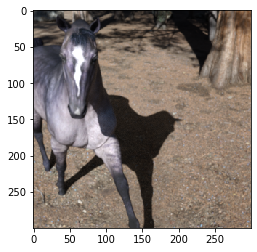

In [2]:
# load image as pixel array
data = image.imread('./horse-or-human/horses/horse43-5.png')

# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

# display the array of pixels as an image
plt.imshow(data)
plt.show()

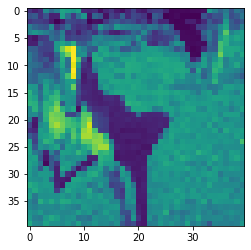

In [3]:
# Using cv2.imread() method 
# Using 0 to read image in grayscale mode 
img = cv2.imread('./horse-or-human/horses/horse43-5.png', 0) 

IMG_SIZE = 40

resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

resized_img

plt.imshow(resized_img)
plt.show()

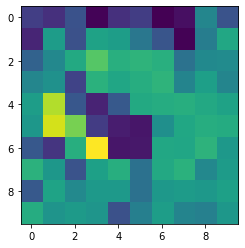

In [4]:
# reducing the image to 10 x 10
img = cv2.imread('./horse-or-human/horses/horse43-5.png', 0) 

IMG_SIZE = 10

resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

resized_img

plt.imshow(resized_img)
plt.show()

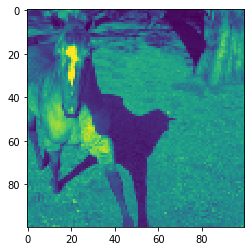

In [5]:
# Reducing the image to 100 x 100 
img = cv2.imread('./horse-or-human/horses/horse43-5.png', 0) 

IMG_SIZE = 100

resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

resized_img

plt.imshow(resized_img)
plt.show()

## Train data

In [6]:
# create a list of the all the horse and human images in the train dataset
# create a list of all the corresponding image filenames

train_data = []
file_name = []

DATADIR = "./horse-or-human"
CATEGORIES = ["horses","humans"]

# resize all images so there is an appropriate number of pixel features
IMG_SIZE = 40

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for filename in listdir(path):
        img_data = cv2.imread(os.path.join(path,filename),0)    
        img = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE)).flatten()
        train_data.append(img)
        file_name.append(filename)
    
len(train_data)

1027

In [7]:
# create a list of all the images' classes: horse or human

classification = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for filename in listdir(path):
        if category == "horses":
            classification.append("horse")
        else:
            classification.append("human")
            
print(classification)

['horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 

In [8]:
# view list of file names

file_name

['horse43-5.png',
 'horse06-5.png',
 'horse20-6.png',
 'horse04-7.png',
 'horse41-7.png',
 'horse22-4.png',
 'horse19-2.png',
 'horse24-2.png',
 'horse37-8.png',
 'horse02-1.png',
 'horse47-1.png',
 'horse39-7.png',
 'horse26-0.png',
 'horse13-9.png',
 'horse45-3.png',
 'horse45-2.png',
 'horse13-8.png',
 'horse26-1.png',
 'horse39-6.png',
 'horse02-0.png',
 'horse37-9.png',
 'horse47-0.png',
 'horse24-3.png',
 'horse19-3.png',
 'horse22-5.png',
 'horse04-6.png',
 'horse41-6.png',
 'horse20-7.png',
 'horse43-4.png',
 'horse06-4.png',
 'horse20-5.png',
 'horse06-6.png',
 'horse43-6.png',
 'horse08-9.png',
 'horse22-7.png',
 'horse41-4.png',
 'horse04-4.png',
 'horse19-1.png',
 'horse47-2.png',
 'horse02-2.png',
 'horse11-8.png',
 'horse24-1.png',
 'horse39-4.png',
 'horse35-9.png',
 'horse45-0.png',
 'horse26-3.png',
 'horse26-2.png',
 'horse35-8.png',
 'horse45-1.png',
 'horse39-5.png',
 'horse24-0.png',
 'horse11-9.png',
 'horse47-3.png',
 'horse02-3.png',
 'horse19-0.png',
 'horse41-

In [9]:
# create a DataFrame for all the train_data

train_df = pd.DataFrame(data=train_data)

train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,43,27,39,124,90,112,151,145,137,148,...,110,125,105,73,117,113,114,110,114,136
1,156,157,157,157,157,158,158,157,157,157,...,86,140,183,182,213,201,183,196,206,214
2,141,141,140,140,140,139,139,139,139,138,...,174,178,42,32,29,115,178,177,174,173
3,234,194,180,177,180,174,173,170,169,166,...,177,173,177,179,176,178,184,192,200,196
4,109,110,110,111,109,109,110,115,124,136,...,52,73,46,54,49,45,48,42,60,32


In [10]:
# create the classification feature column

train_df["category"] = classification

In [11]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,category
0,43,27,39,124,90,112,151,145,137,148,...,125,105,73,117,113,114,110,114,136,horse
1,156,157,157,157,157,158,158,157,157,157,...,140,183,182,213,201,183,196,206,214,horse
2,141,141,140,140,140,139,139,139,139,138,...,178,42,32,29,115,178,177,174,173,horse
3,234,194,180,177,180,174,173,170,169,166,...,173,177,179,176,178,184,192,200,196,horse
4,109,110,110,111,109,109,110,115,124,136,...,73,46,54,49,45,48,42,60,32,horse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,65,75,84,85,87,115,123,99,93,98,...,78,70,73,55,55,42,46,49,45,human
1023,236,229,180,196,190,180,219,159,166,201,...,63,41,80,125,35,32,69,71,150,human
1024,182,185,189,191,194,196,198,200,202,203,...,114,90,85,52,39,57,83,94,108,human
1025,99,102,105,108,110,114,117,120,124,128,...,12,12,11,15,95,97,95,88,88,human


In [12]:
# recode into binary

train_df["category"] = train_df["category"].map({"human":1, "horse":0})

In [13]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,category
0,43,27,39,124,90,112,151,145,137,148,...,125,105,73,117,113,114,110,114,136,0
1,156,157,157,157,157,158,158,157,157,157,...,140,183,182,213,201,183,196,206,214,0
2,141,141,140,140,140,139,139,139,139,138,...,178,42,32,29,115,178,177,174,173,0
3,234,194,180,177,180,174,173,170,169,166,...,173,177,179,176,178,184,192,200,196,0
4,109,110,110,111,109,109,110,115,124,136,...,73,46,54,49,45,48,42,60,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,65,75,84,85,87,115,123,99,93,98,...,78,70,73,55,55,42,46,49,45,1
1023,236,229,180,196,190,180,219,159,166,201,...,63,41,80,125,35,32,69,71,150,1
1024,182,185,189,191,194,196,198,200,202,203,...,114,90,85,52,39,57,83,94,108,1
1025,99,102,105,108,110,114,117,120,124,128,...,12,12,11,15,95,97,95,88,88,1


In [14]:
# create a column for the filename

train_df["filename"] = file_name

train_df

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,category,filename
0,43,27,39,124,90,112,151,145,137,148,...,105,73,117,113,114,110,114,136,0,horse43-5.png
1,156,157,157,157,157,158,158,157,157,157,...,183,182,213,201,183,196,206,214,0,horse06-5.png
2,141,141,140,140,140,139,139,139,139,138,...,42,32,29,115,178,177,174,173,0,horse20-6.png
3,234,194,180,177,180,174,173,170,169,166,...,177,179,176,178,184,192,200,196,0,horse04-7.png
4,109,110,110,111,109,109,110,115,124,136,...,46,54,49,45,48,42,60,32,0,horse41-7.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,65,75,84,85,87,115,123,99,93,98,...,70,73,55,55,42,46,49,45,1,human09-13.png
1023,236,229,180,196,190,180,219,159,166,201,...,41,80,125,35,32,69,71,150,1,human09-07.png
1024,182,185,189,191,194,196,198,200,202,203,...,90,85,52,39,57,83,94,108,1,human17-13.png
1025,99,102,105,108,110,114,117,120,124,128,...,12,11,15,95,97,95,88,88,1,human17-07.png


In [15]:
# view datatypes for each feature

train_df.dtypes

0            int64
1            int64
2            int64
3            int64
4            int64
             ...  
1597         int64
1598         int64
1599         int64
category     int64
filename    object
Length: 1602, dtype: object

In [16]:
# print out features and target for the train data

features = train_df.columns[:-2].tolist()

target = "category"

print(features)
print(target)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [17]:
# rename target for modelling

y_train = train_df[target]

y_train

0       0
1       0
2       0
3       0
4       0
       ..
1022    1
1023    1
1024    1
1025    1
1026    1
Name: category, Length: 1027, dtype: int64

In [18]:
# rename features for modelling

X_train = train_df[features]

X_train

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,43,27,39,124,90,112,151,145,137,148,...,110,125,105,73,117,113,114,110,114,136
1,156,157,157,157,157,158,158,157,157,157,...,86,140,183,182,213,201,183,196,206,214
2,141,141,140,140,140,139,139,139,139,138,...,174,178,42,32,29,115,178,177,174,173
3,234,194,180,177,180,174,173,170,169,166,...,177,173,177,179,176,178,184,192,200,196
4,109,110,110,111,109,109,110,115,124,136,...,52,73,46,54,49,45,48,42,60,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,65,75,84,85,87,115,123,99,93,98,...,75,78,70,73,55,55,42,46,49,45
1023,236,229,180,196,190,180,219,159,166,201,...,29,63,41,80,125,35,32,69,71,150
1024,182,185,189,191,194,196,198,200,202,203,...,136,114,90,85,52,39,57,83,94,108
1025,99,102,105,108,110,114,117,120,124,128,...,15,12,12,11,15,95,97,95,88,88


## Test data

In [19]:
# create a list of the all the horse and human images in the test dataset
# create a list of all the corresponding image filenames

test_data = []
test_file_names = []
DATADIR_VAL = "./validation-horse-or-human"
CATEGORIES = ["horses","humans"]

IMG_SIZE = 40

for category in CATEGORIES:
    path_val = os.path.join(DATADIR_VAL, category)
    class_num = CATEGORIES.index(category)
    for filename in listdir(path_val):
        img_data = cv2.imread(os.path.join(path_val,filename),0)    
        img = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE)).flatten()
        test_data.append(img)
        test_file_names.append(filename)
    
len(test_data)

256

In [20]:
# view list of test file names

test_file_names

['horse1-204.png',
 'horse2-112.png',
 'horse3-498.png',
 'horse5-032.png',
 'horse5-018.png',
 'horse1-170.png',
 'horse5-192.png',
 'horse1-411.png',
 'horse4-232.png',
 'horse3-070.png',
 'horse1-000.png',
 'horse5-342.png',
 'horse5-550.png',
 'horse4-541.png',
 'horse4-345.png',
 'horse2-314.png',
 'horse5-181.png',
 'horse5-235.png',
 'horse3-099.png',
 'horse4-556.png',
 'horse3-217.png',
 'horse1-298.png',
 'horse2-011.png',
 'horse1-105.png',
 'horse4-530.png',
 'horse6-153.png',
 'horse6-345.png',
 'horse1-264.png',
 'horse6-218.png',
 'horse4-043.png',
 'horse3-198.png',
 'horse2-412.png',
 'horse4-495.png',
 'horse5-123.png',
 'horse3-416.png',
 'horse2-201.png',
 'horse5-519.png',
 'horse1-539.png',
 'horse4-468.png',
 'horse3-171.png',
 'horse1-276.png',
 'horse1-510.png',
 'horse6-544.png',
 'horse5-478.png',
 'horse3-011.png',
 'horse5-083.png',
 'horse2-582.png',
 'horse5-065.png',
 'horse2-596.png',
 'horse1-455.png',
 'horse4-302.png',
 'horse6-004.png',
 'horse3-141

In [21]:
# create a list of all the images' classes: horse or human

test_classification = []
for category in CATEGORIES:
    path_val_name = os.path.join(DATADIR_VAL, category)
    for filename in listdir(path_val_name):
        if category == "horses":
            test_classification.append("horse")
        else:
            test_classification.append("human")
            
print(test_classification)

['horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 

In [22]:
# create a DataFrame for all the test_data

test_df = pd.DataFrame(data=test_data)

test_df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,253,254,254,254,254,254,255,254,254,255
252,255,255,255,255,255,255,255,255,255,255,...,252,253,253,253,254,254,254,254,255,255
253,255,255,255,255,255,255,255,255,255,255,...,254,254,254,253,254,255,254,254,255,254
254,255,255,255,255,255,255,255,255,255,255,...,252,252,253,253,253,254,254,254,254,254


In [23]:
# create the classification feature column

test_df["category"] = test_classification

test_df["category"]

0      horse
1      horse
2      horse
3      horse
4      horse
       ...  
251    human
252    human
253    human
254    human
255    human
Name: category, Length: 256, dtype: object

In [24]:
# recode into binary

test_df["category"] = test_df["category"].map({"human":1, "horse":0})

test_df

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,category
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,255,254,254,255,1
252,255,255,255,255,255,255,255,255,255,255,...,253,253,253,254,254,254,254,255,255,1
253,255,255,255,255,255,255,255,255,255,255,...,254,254,253,254,255,254,254,255,254,1
254,255,255,255,255,255,255,255,255,255,255,...,252,253,253,253,254,254,254,254,254,1


In [25]:
# create a column for the filename

test_df["filename"] = test_file_names

test_df

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,category,filename
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse1-204.png
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse2-112.png
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse3-498.png
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse5-032.png
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse5-018.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,255,254,254,255,1,valhuman01-21.png
252,255,255,255,255,255,255,255,255,255,255,...,253,253,254,254,254,254,255,255,1,valhuman04-05.png
253,255,255,255,255,255,255,255,255,255,255,...,254,253,254,255,254,254,255,254,1,valhuman04-11.png
254,255,255,255,255,255,255,255,255,255,255,...,253,253,253,254,254,254,254,254,1,valhuman03-18.png


In [26]:
# print out features and target for the test data

test_features = test_df.columns[:-2].tolist()

test_target = "category"

In [27]:
# rename features for modelling

X_test = test_df[test_features]

X_test

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,253,254,254,254,254,254,255,254,254,255
252,255,255,255,255,255,255,255,255,255,255,...,252,253,253,253,254,254,254,254,255,255
253,255,255,255,255,255,255,255,255,255,255,...,254,254,254,253,254,255,254,254,255,254
254,255,255,255,255,255,255,255,255,255,255,...,252,252,253,253,253,254,254,254,254,254


In [28]:
# rename target for modelling

y_test = test_df[test_target]

y_test

0      0
1      0
2      0
3      0
4      0
      ..
251    1
252    1
253    1
254    1
255    1
Name: category, Length: 256, dtype: int64

In [29]:
y_train.shape

(1027,)

In [30]:
y_test.shape

(256,)

## SVM

In [31]:
from sklearn import svm

clr = svm.SVC(probability=True)

In [32]:
clr.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,43,27,39,124,90,112,151,145,137,148,...,110,125,105,73,117,113,114,110,114,136
1,156,157,157,157,157,158,158,157,157,157,...,86,140,183,182,213,201,183,196,206,214
2,141,141,140,140,140,139,139,139,139,138,...,174,178,42,32,29,115,178,177,174,173
3,234,194,180,177,180,174,173,170,169,166,...,177,173,177,179,176,178,184,192,200,196
4,109,110,110,111,109,109,110,115,124,136,...,52,73,46,54,49,45,48,42,60,32


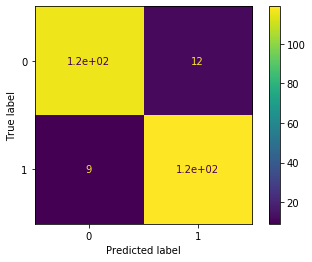

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clr, X_test, y_test) 
plt.show()  

In [35]:
actual = y_test

In [36]:
actual

0      0
1      0
2      0
3      0
4      0
      ..
251    1
252    1
253    1
254    1
255    1
Name: category, Length: 256, dtype: int64

In [37]:
from sklearn import metrics

predicted = clr.predict(X_test)

actual = y_test

metrics.accuracy_score(predicted, actual)

0.91796875

In [38]:
evaluate = pd.DataFrame(data=actual)

In [39]:
evaluate["predicted"] = predicted
evaluate["filename"] = test_file_names

evaluate["filename"]

0         horse1-204.png
1         horse2-112.png
2         horse3-498.png
3         horse5-032.png
4         horse5-018.png
             ...        
251    valhuman01-21.png
252    valhuman04-05.png
253    valhuman04-11.png
254    valhuman03-18.png
255    valhuman03-24.png
Name: filename, Length: 256, dtype: object

In [40]:
evaluate[evaluate["predicted"] != evaluate["category"]]

,category,predicted,filename
2,0,1,horse3-498.png
31,0,1,horse2-412.png
33,0,1,horse5-123.png
35,0,1,horse2-201.png
46,0,1,horse2-582.png
48,0,1,horse2-596.png
74,0,1,horse4-503.png
77,0,1,horse4-501.png
89,0,1,horse3-484.png
101,0,1,horse1-554.png


## Incorrect predictions

float32
(300, 300, 4)


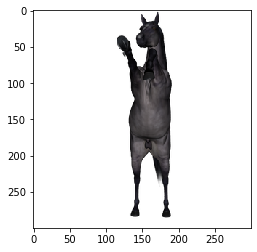

In [41]:
# load image as pixel array
data = image.imread('./validation-horse-or-human/horses/horse3-498.png')

# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

# display the array of pixels as an image
plt.imshow(data)
plt.show()

In [42]:
# create a list of filenames for all images predicted incorrectly

wrong_preds = evaluate[evaluate["predicted"] != evaluate["category"]]
wrong_preds_filenames = []
for filename in wrong_preds["filename"]:
    wrong_preds_filenames.append(filename)

wrong_preds_filenames

['horse3-498.png',
 'horse2-412.png',
 'horse5-123.png',
 'horse2-201.png',
 'horse2-582.png',
 'horse2-596.png',
 'horse4-503.png',
 'horse4-501.png',
 'horse3-484.png',
 'horse1-554.png',
 'horse3-521.png',
 'horse4-548.png',
 'valhuman03-00.png',
 'valhuman04-09.png',
 'valhuman02-17.png',
 'valhuman02-16.png',
 'valhuman01-24.png',
 'valhuman03-23.png',
 'valhuman01-23.png',
 'valhuman04-10.png',
 'valhuman03-24.png']

PREDICTED AS HUMAN: horse3-498.png


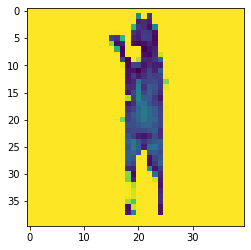

PREDICTED AS HUMAN: horse2-412.png


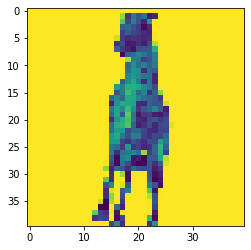

PREDICTED AS HUMAN: horse5-123.png


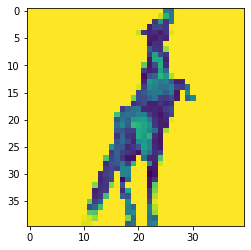

PREDICTED AS HUMAN: horse2-201.png


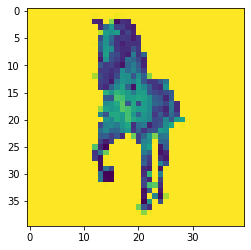

PREDICTED AS HUMAN: horse2-582.png


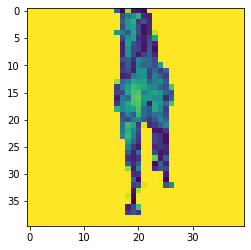

PREDICTED AS HUMAN: horse2-596.png


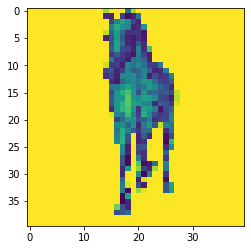

PREDICTED AS HUMAN: horse4-503.png


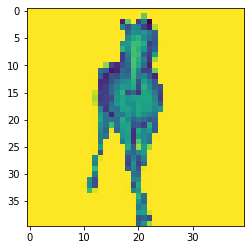

PREDICTED AS HUMAN: horse4-501.png


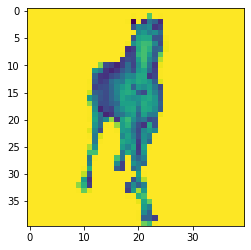

PREDICTED AS HUMAN: horse3-484.png


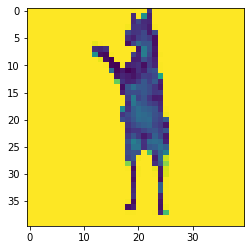

PREDICTED AS HUMAN: horse1-554.png


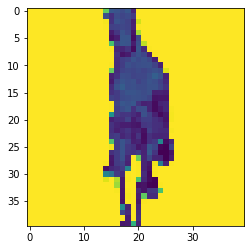

PREDICTED AS HUMAN: horse3-521.png


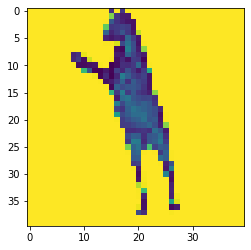

In [43]:
# show all horse images predicted as human

DATADIR_VAL_HORSES = "./validation-horse-or-human/horses"
IMG_SIZE = 40

for filename in wrong_preds_filenames[0:11]:
    data = cv2.imread(os.path.join(DATADIR_VAL_HORSES,filename), 0)
    resized_img = cv2.resize(data, (IMG_SIZE, IMG_SIZE))
    print("PREDICTED AS HUMAN:", filename)
    plt.imshow(resized_img)
    plt.show()

PREDICTED AS HORSE: valhuman03-00.png


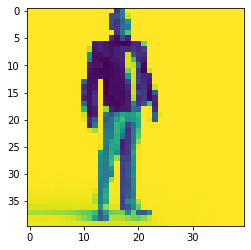

PREDICTED AS HORSE: valhuman04-09.png


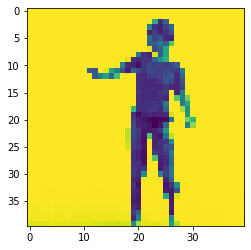

PREDICTED AS HORSE: valhuman02-17.png


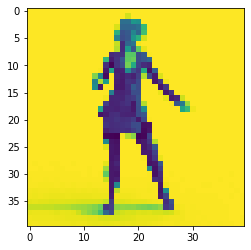

PREDICTED AS HORSE: valhuman02-16.png


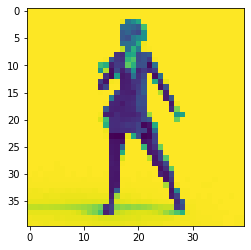

PREDICTED AS HORSE: valhuman01-24.png


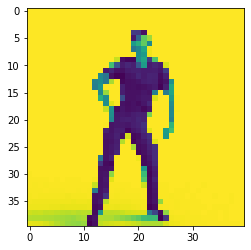

PREDICTED AS HORSE: valhuman03-23.png


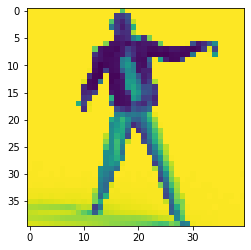

PREDICTED AS HORSE: valhuman01-23.png


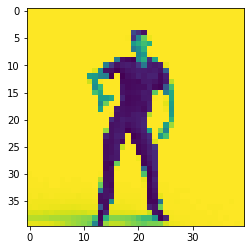

PREDICTED AS HORSE: valhuman04-10.png


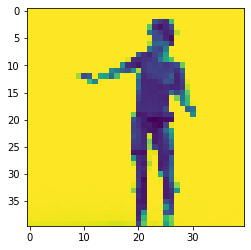

PREDICTED AS HORSE: valhuman03-24.png


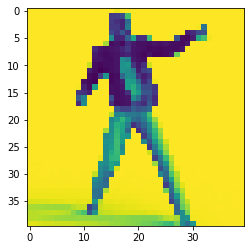

In [44]:
# show all human images predicted as horse

DATADIR_VAL_HUMANS = "./validation-horse-or-human/humans"
IMG_SIZE = 40

for filename in wrong_preds_filenames[12:21]:
    data = cv2.imread(os.path.join(DATADIR_VAL_HUMANS,filename),0)
    resized_img = cv2.resize(data, (IMG_SIZE, IMG_SIZE))
    print("PREDICTED AS HORSE:", filename)
    plt.imshow(resized_img)
    plt.show()

## Classification report

In [45]:
print(metrics.classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       128
           1       0.91      0.93      0.92       128

    accuracy                           0.92       256
   macro avg       0.92      0.92      0.92       256
weighted avg       0.92      0.92      0.92       256

